In [103]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # Função para dividir um conjunto de dados em conjuntos de treinamento e teste.
from sklearn.linear_model import LinearRegression # Classe para realizar regressão linear.
from sklearn.linear_model import LogisticRegression # Classe para realizar regressão logística.
from sklearn.ensemble import RandomForestClassifier  # Classe para construir um modelo de classificação usando um conjunto de árvores de decisão aleatórias.
from sklearn.ensemble import GradientBoostingClassifier # Classe para construir um modelo de classificação usando a técnica de boosting com árvores de decisão.
from sklearn.tree import DecisionTreeClassifier # Classe para construir um modelo de classificação baseado em uma árvore de decisão.
from sklearn.svm import SVC # Classe para construir um modelo de classificação ou regressão usando máquinas de vetores de suporte.
from sklearn.neighbors import KNeighborsClassifier # Classe para construir um modelo de classificação baseado no algoritmo k-vizinhos mais próximos (KNN).
from sklearn.neural_network import MLPClassifier # Classe para construir um modelo de classificação usando uma rede neural perceptron multicamada (MLP).
from sklearn.naive_bayes import MultinomialNB # Classe para construir um modelo de classificação usando o algoritmo Naive Bayes multinomial.
from xgboost import XGBClassifier # Classe para construir um modelo de classificação usando o algoritmo LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, r2_score # Função para calcular a precisão de um modelo de classificação.
from sklearn.preprocessing import MinMaxScaler # Dimensiona os dados para que de modo que todos os valores de recursos estejam no intervalo [0, 1]

In [104]:
dados = pd.read_csv('diabetes.csv')
#https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset

In [105]:
# Avaliar se os dados e seus Dtype estão corretos e pré identificar possíveis colunas com valores nulos
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [106]:
# Confirmar se há colunas com valores nulos
dados.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [107]:
dados.isnull().sum()
#mesma função anterior, mas de outra forma - somente para aprendizado

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [108]:
dados.duplicated().sum()
#identificar se há valores duplicados

0

In [109]:
dados.columns
#nomes das colunas no arquivo original

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [110]:
dados = dados.rename(columns={'Pregnancies': 'Gravidez', 'Glucose': 'Glicose', 'BloodPressure': 'Pressão arterial',
                              'SkinThickness': 'Espessura da pele', 'Insulin': 'Insulina', 'BMI': 'IMC',
                              'DiabetesPedigreeFunction': 'Função Pedigree', 'Age': 'Idade', 'Outcome': 'Resultado'})
#renomear colunas para facilitar usuário compreender melhor os dados na lingua portuguesa

In [111]:
dados.columns
#mostrar e confirmar mudança dos nomes das colunas

Index(['Gravidez', 'Glicose', 'Pressão arterial', 'Espessura da pele',
       'Insulina', 'IMC', 'Função Pedigree', 'Idade', 'Resultado'],
      dtype='object')

In [112]:
dados.head()
#mostrar os dados iniciais

,Gravidez,Glicose,Pressão arterial,Espessura da pele,Insulina,IMC,Função Pedigree,Idade,Resultado
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [113]:
dados.describe()
#descrição dos dados. Podemos observaro valores mínimos zerados que não deveriam ser (Glicose, Pressão arterial, ...)

,Gravidez,Glicose,Pressão arterial,Espessura da pele,Insulina,IMC,Função Pedigree,Idade,Resultado
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [114]:
dados[dados['Glicose']==0]
#mostrar dados onde glicemia é zero

,Gravidez,Glicose,Pressão arterial,Espessura da pele,Insulina,IMC,Função Pedigree,Idade,Resultado
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [115]:
dados[dados['Glicose']>0].describe()
#mostrar a descrição dos dados onde glicemia é maior que zero

,Gravidez,Glicose,Pressão arterial,Espessura da pele,Insulina,IMC,Função Pedigree,Idade,Resultado
count,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000
mean,3.851900,121.686763,69.115334,20.477064,80.292267,31.986763,0.472477,33.271298,0.348624
std,3.374729,30.535641,19.399240,15.973171,115.457448,7.893221,0.331963,11.772161,0.476847
min,0.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.000000,32.000000,0.374000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,128.500000,36.550000,0.626500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [116]:
dados['Glicose'] = dados['Glicose'].replace(0, (dados['Glicose'][dados['Glicose']>0].mean().round()))
#mudados os dados zerados da glicemia para a média da glicemia dos valores a cima de zero, com valores interios arredondados

In [117]:
dados[dados['Pressão arterial']==0]
#mostrar dados onde pressão arterial é zero

,Gravidez,Glicose,Pressão arterial,Espessura da pele,Insulina,IMC,Função Pedigree,Idade,Resultado
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1
81,2,74,0,0,0,0.0,0.102,22,0
172,2,87,0,23,0,28.9,0.773,25,0
193,11,135,0,0,0,52.3,0.578,40,1
222,7,119,0,0,0,25.2,0.209,37,0
261,3,141,0,0,0,30.0,0.761,27,1


In [118]:
dados[dados['Pressão arterial']>0].describe()
#mostrar a descrição dos dados onde pressão arteial é maior que zero

,Gravidez,Glicose,Pressão arterial,Espessura da pele,Insulina,IMC,Função Pedigree,Idade,Resultado
count,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000
mean,3.855389,121.874488,72.405184,21.444748,83.609823,32.292769,0.475861,33.361528,0.343793
std,3.358106,30.574250,12.382158,15.705756,116.606997,7.271540,0.334179,11.837077,0.475297
min,0.000000,44.000000,24.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,0.000000,0.000000,27.400000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,24.000000,45.000000,32.300000,0.380000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,33.000000,130.000000,36.600000,0.629000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [119]:
dados['Pressão arterial'] = dados['Pressão arterial'].replace(0, (dados['Pressão arterial'][dados['Pressão arterial']>0].mean().round()))
 #mudados os dados zerados da pressão arterial para a média da pressão dos valores a cima de zero, com valores interios arredondados

In [120]:
dados[dados['Espessura da pele']==0]
#mostrar dados onde espessura da pele é zero

,Gravidez,Glicose,Pressão arterial,Espessura da pele,Insulina,IMC,Função Pedigree,Idade,Resultado
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,72,0,0,35.3,0.134,29,0
9,8,125,96,0,0,0.0,0.232,54,1
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
757,0,123,72,0,0,36.3,0.258,52,1
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
762,9,89,62,0,0,22.5,0.142,33,0


In [121]:
dados[dados['Espessura da pele']>0].describe()
#mostrar a descrição dos dados onde espessura da pele é maior que zero

,Gravidez,Glicose,Pressão arterial,Espessura da pele,Insulina,IMC,Função Pedigree,Idade,Resultado
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,3.512015,120.950092,71.463956,29.153420,113.282810,32.774122,0.504850,31.558226,0.332717
std,3.324759,30.787794,12.261997,10.476982,122.735833,7.144264,0.346639,10.743768,0.471622
min,0.000000,56.000000,24.000000,7.000000,0.000000,0.000000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,0.000000,27.800000,0.259000,23.000000,0.000000
50%,2.000000,116.000000,72.000000,29.000000,90.000000,32.800000,0.417000,28.000000,0.000000
75%,5.000000,140.000000,80.000000,36.000000,165.000000,36.900000,0.660000,38.000000,1.000000
max,17.000000,199.000000,110.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [122]:
dados['Espessura da pele'] = dados['Espessura da pele'].replace(0, (dados['Espessura da pele'][dados['Espessura da pele']>0].mean().round()))
#mudados os dados zerados da espessura da pele para a média da espessura dos valores a cima de zero, com valores interios arredondados

In [123]:
dados[dados['Insulina']==0]
#mostrar dados onde insulina é zero

,Gravidez,Glicose,Pressão arterial,Espessura da pele,Insulina,IMC,Função Pedigree,Idade,Resultado
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,29,0,23.3,0.672,32,1
5,5,116,74,29,0,25.6,0.201,30,0
7,10,115,72,29,0,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,29,0,22.5,0.142,33,0
764,2,122,70,27,0,36.8,0.340,27,0
766,1,126,60,29,0,30.1,0.349,47,1


In [124]:
dados[dados['Insulina']>0].describe()

,Gravidez,Glicose,Pressão arterial,Espessura da pele,Insulina,IMC,Função Pedigree,Idade,Resultado
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,3.286802,122.614213,70.654822,29.106599,155.548223,32.988579,0.525543,30.814721,0.329949
std,3.209635,30.783053,12.469919,10.504273,118.775855,7.210160,0.350127,10.198971,0.470792
min,0.000000,56.000000,24.000000,7.000000,14.000000,0.000000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.250000,28.325000,0.270250,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.000000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,36.750000,190.000000,37.075000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [125]:
dados['Insulina'] = dados['Insulina'].replace(0, (dados['Insulina'][dados['Insulina']>0].mean().round()))
#mudados os dados zerados da insulina para a média da insulina dos valores a cima de zero, com valores interios arredondados

In [126]:
dados.groupby(by=['Insulina']).mean().sort_values(by='Insulina', ascending=False)
#Agrupados e colocados em ordem para facilitar identificação de valores outliers

,Gravidez,Glicose,Pressão arterial,Espessura da pele,IMC,Função Pedigree,Idade,Resultado
Insulina,,,,,,,,
846,1.0,189.0,60.0,23.0,30.10,0.398,59.0,1.0
744,4.0,197.0,70.0,39.0,36.70,2.329,31.0,0.0
680,0.0,165.0,90.0,33.0,52.30,0.427,23.0,0.0
600,8.0,124.0,76.0,24.0,28.70,0.687,52.0,1.0
579,1.0,172.0,68.0,49.0,42.40,0.702,28.0,1.0
...,...,...,...,...,...,...,...,...
22,5.0,126.0,78.0,27.0,29.60,0.439,40.0,0.0
18,2.0,91.0,65.0,30.5,36.45,0.374,23.0,0.0
16,2.0,88.0,58.0,26.0,28.40,0.766,22.0,0.0


In [127]:
dados[dados['IMC']==0]
#mostrar dados onde IMC é zero

,Gravidez,Glicose,Pressão arterial,Espessura da pele,Insulina,IMC,Função Pedigree,Idade,Resultado
9,8,125,96,29,156,0.0,0.232,54,1
49,7,105,72,29,156,0.0,0.305,24,0
60,2,84,72,29,156,0.0,0.304,21,0
81,2,74,72,29,156,0.0,0.102,22,0
145,0,102,75,23,156,0.0,0.572,21,0
371,0,118,64,23,89,0.0,1.731,21,0
426,0,94,72,29,156,0.0,0.256,25,0
494,3,80,72,29,156,0.0,0.174,22,0
522,6,114,72,29,156,0.0,0.189,26,0
684,5,136,82,29,156,0.0,0.640,69,0


In [128]:
dados[dados['IMC']>0].describe()
#mostrar a descrição dos dados onde Indice de Massa corpória (IMC) é maior que zero

,Gravidez,Glicose,Pressão arterial,Espessura da pele,Insulina,IMC,Função Pedigree,Idade,Resultado
count,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000
mean,3.844122,121.941876,72.354029,29.125495,155.853369,32.457464,0.472437,33.281374,0.351387
std,3.369959,30.499836,12.144692,8.849347,85.603234,6.924988,0.329474,11.697752,0.477719
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,25.000000,120.000000,27.500000,0.244000,24.000000,0.000000
50%,3.000000,118.000000,72.000000,29.000000,156.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,156.000000,36.600000,0.627000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [129]:
dados['IMC'] = dados['IMC'].replace(0, (dados['IMC'][dados['IMC']>0].mean().round()))
#mudados os dados zerados da IMC para a média do IMC dos valores a cima de zero, com valores interios arredondados

In [130]:
dados.describe()
#Mostra novamente a descrição dos dados, agora sem valores zerados, onde esses são sabidamente não viaveis

,Gravidez,Glicose,Pressão arterial,Espessura da pele,Insulina,IMC,Função Pedigree,Idade,Resultado
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.688802,72.386719,29.108073,155.768229,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.435959,12.096642,8.791221,85.021408,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,156.000000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,156.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [131]:
dados.mean()
#mostrar a media de todas as colunas

,0
Gravidez,3.845052
Glicose,121.688802
Pressão arterial,72.386719
Espessura da pele,29.108073
Insulina,155.768229
IMC,32.450911
Função Pedigree,0.471876
Idade,33.240885
Resultado,0.348958


In [133]:
dados[dados['Gravidez']==1]
#mostrar seleção de dados especificos

,Gravidez,Glicose,Pressão arterial,Espessura da pele,Insulina,IMC,Função Pedigree,Idade,Resultado
1,1,85,66,29,156,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
13,1,189,60,23,846,30.1,0.398,59,1
18,1,103,30,38,83,43.3,0.183,33,0
19,1,115,70,30,96,34.6,0.529,32,1
...,...,...,...,...,...,...,...,...,...
751,1,121,78,39,74,39.0,0.261,28,0
755,1,128,88,39,110,36.5,1.057,37,1
758,1,106,76,29,156,37.5,0.197,26,0
766,1,126,60,29,156,30.1,0.349,47,1


In [134]:
dados.corr()
#mostra correlação entre os dados

,Gravidez,Glicose,Pressão arterial,Espessura da pele,Insulina,IMC,Função Pedigree,Idade,Resultado
Gravidez,1.000000,0.127891,0.208615,0.081770,0.056479,0.021546,-0.033523,0.544341,0.221898
Glicose,0.127891,1.000000,0.218530,0.192690,0.420052,0.231484,0.137041,0.266507,0.492935
Pressão arterial,0.208615,0.218530,1.000000,0.191892,0.072906,0.281132,-0.002378,0.324915,0.165723
Espessura da pele,0.081770,0.192690,0.191892,1.000000,0.158134,0.543275,0.102188,0.126107,0.214873
Insulina,0.056479,0.420052,0.072906,0.158134,1.000000,0.166403,0.098191,0.137296,0.214519
IMC,0.021546,0.231484,0.281132,0.543275,0.166403,1.000000,0.153506,0.025744,0.312249
Função Pedigree,-0.033523,0.137041,-0.002378,0.102188,0.098191,0.153506,1.000000,0.033561,0.173844
Idade,0.544341,0.266507,0.324915,0.126107,0.137296,0.025744,0.033561,1.000000,0.238356
Resultado,0.221898,0.492935,0.165723,0.214873,0.214519,0.312249,0.173844,0.238356,1.000000


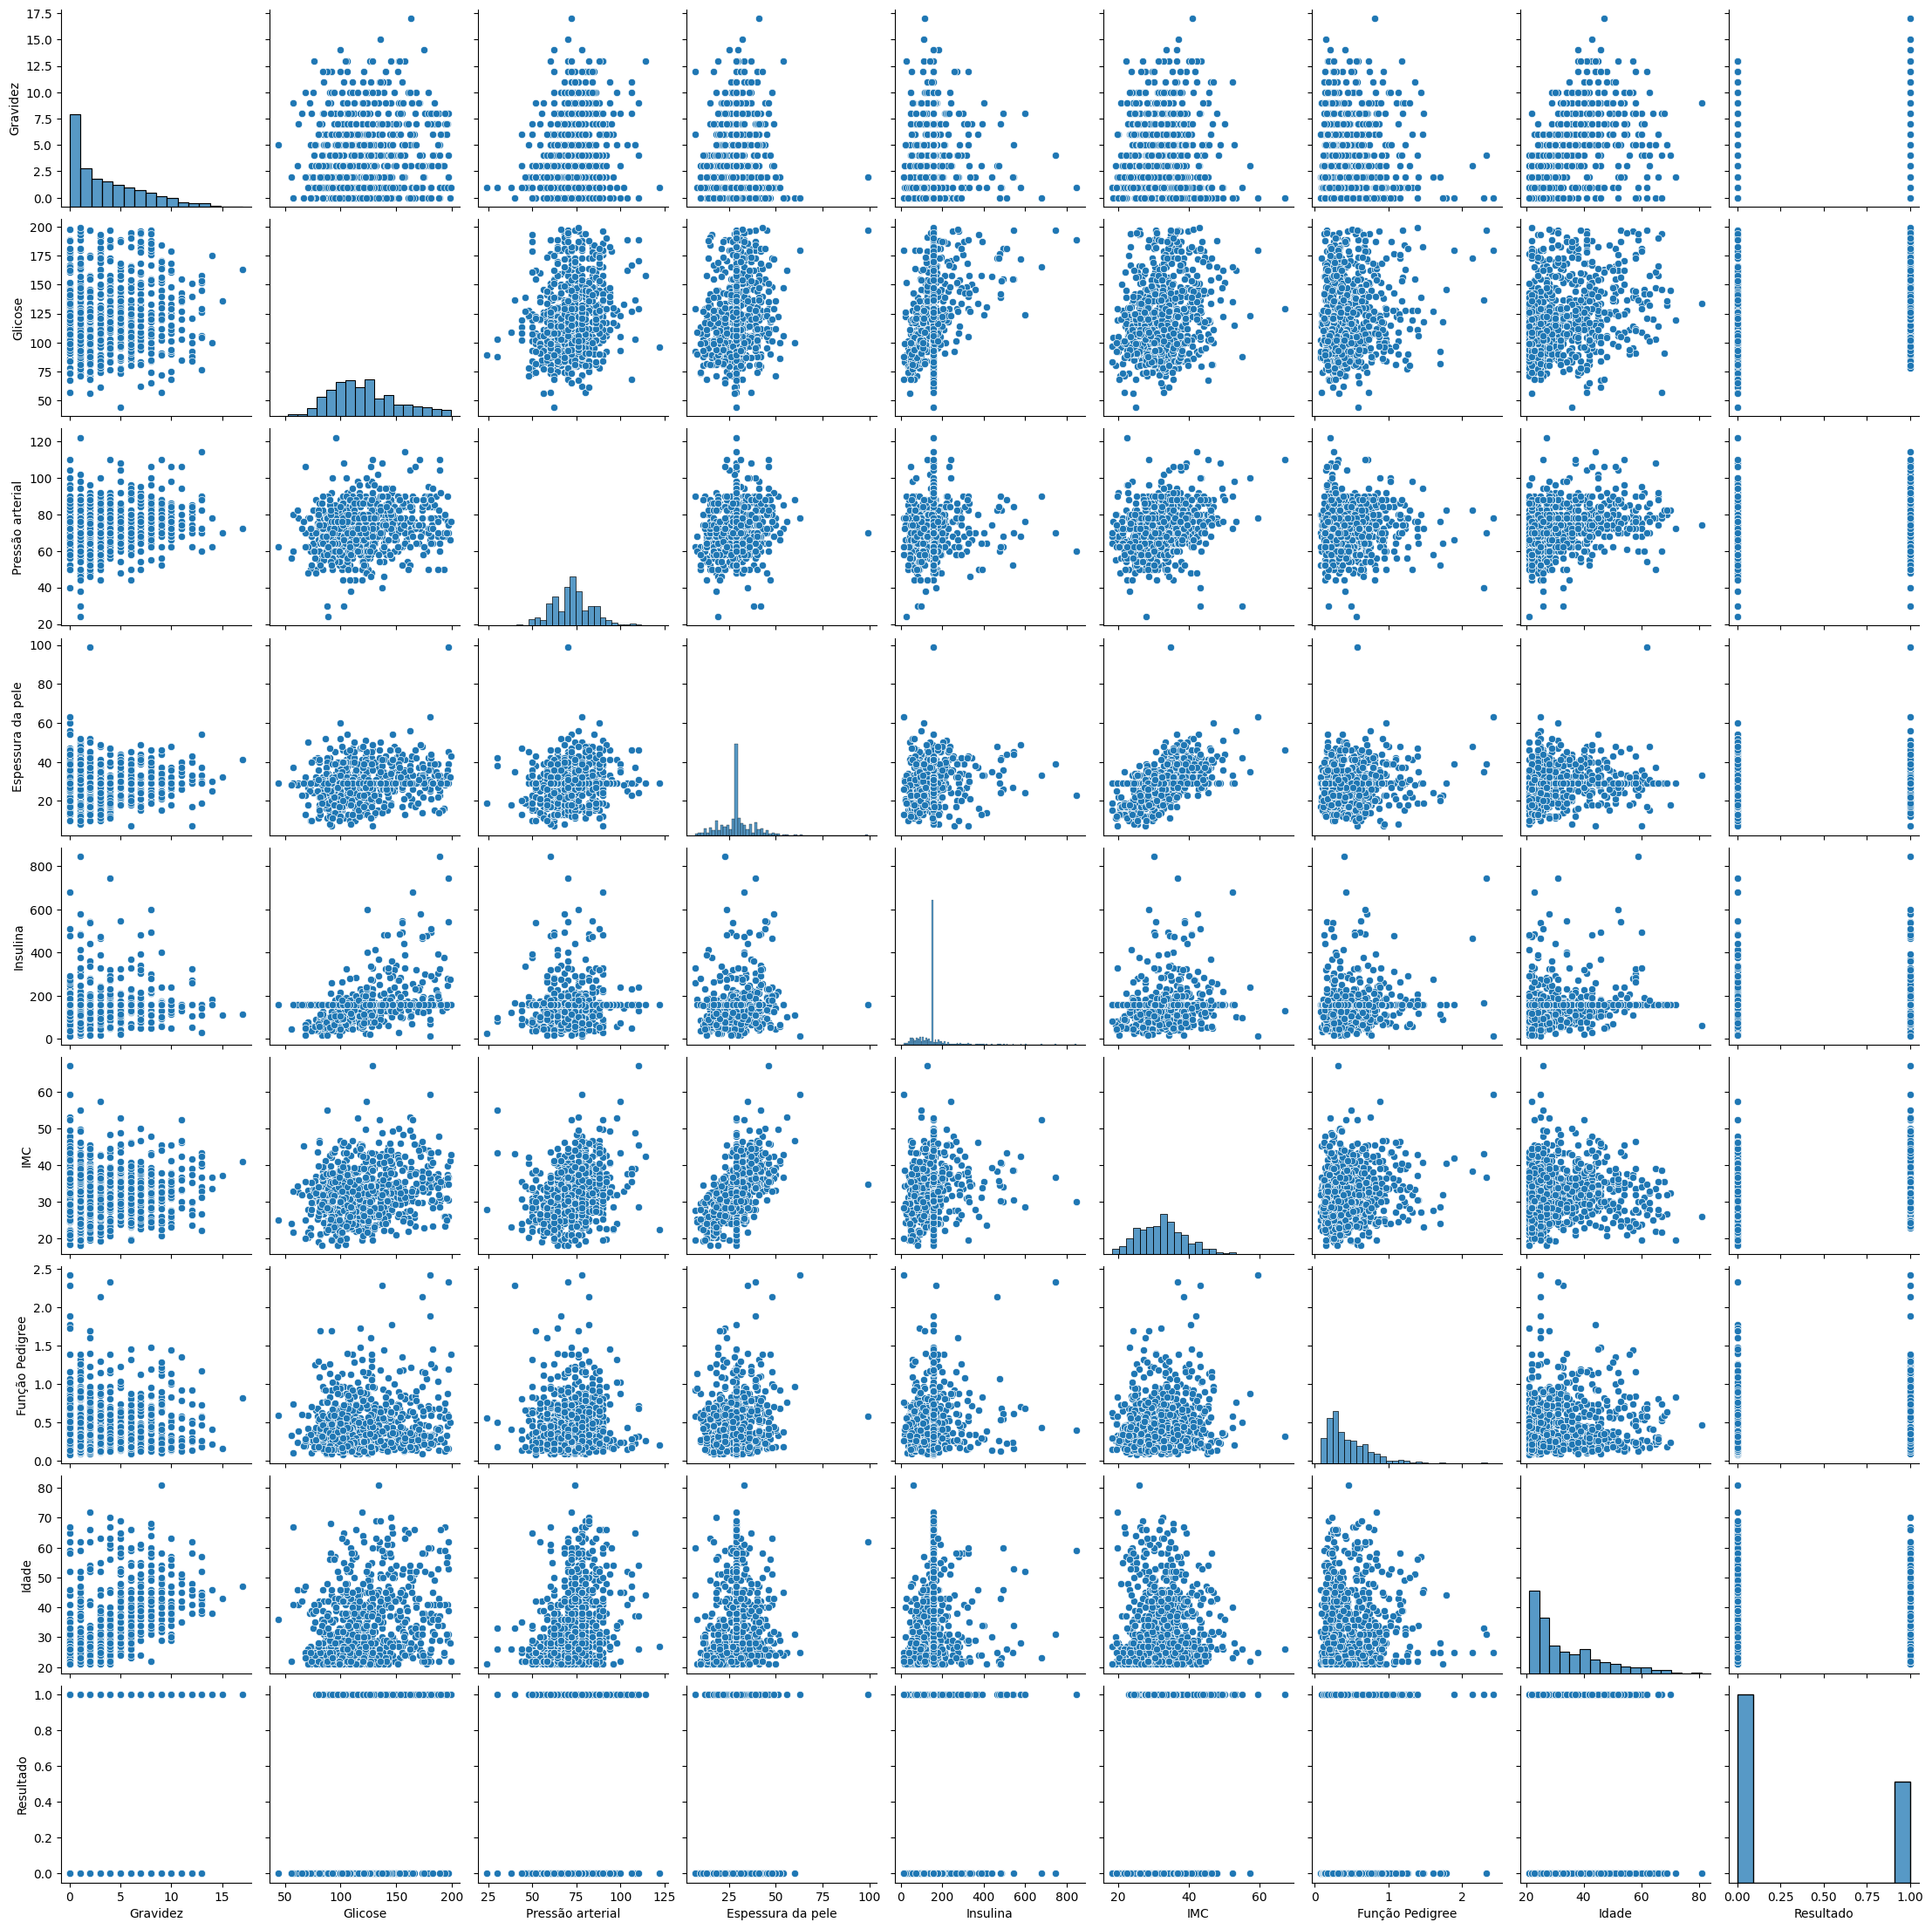

In [135]:
sns.pairplot(dados)
#grafico com correlação dos dados

<Axes: >

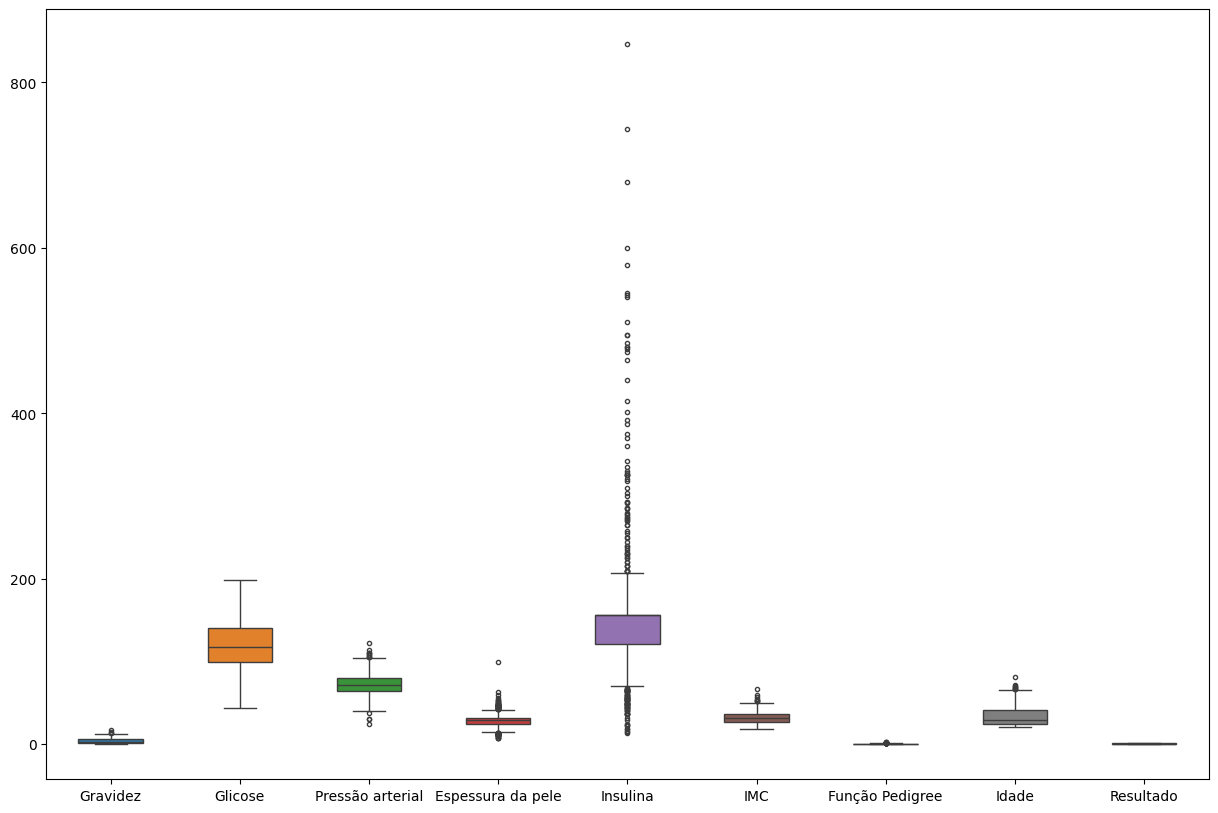

In [136]:
fig,ax = plt.subplots(figsize = (15,10))
sns.boxplot(dados,width=0.5,ax=ax,fliersize=3)
#Grafico com diagrama de caixa de todas as colunas

<Axes: ylabel='Insulina'>

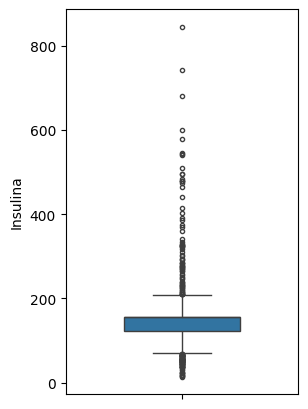

In [137]:
fig,ax = plt.subplots(figsize = (3,5))
sns.boxplot(dados['Insulina'],width=0.5,ax=ax,fliersize=3)
#Diagrama de caixa dos valores de Insulina - atraves desse grafico podemos iniciar discução sobre qualidade dos dados, pois identificados valores atipicos

In [138]:
# Calcula o primeiro quartil (Q1) e o terceiro quartil (Q3)
Q1 = dados['Insulina'].quantile(0.25)
Q3 = dados['Insulina'].quantile(0.75)

# Calcula o intervalo interquartil (IQR)
IQR = Q3 - Q1

# Define os limites para detectar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print("Limite inferior:", limite_inferior)
print("Limite superior:", limite_superior)

Limite inferior: 69.75
Limite superior: 207.75


In [139]:
# Altera os dados onde há outliers para dentro do valor sem
dados.loc[dados['Insulina'] > 208, 'Insulina'] = 207
dados.loc[dados['Insulina'] < 69, 'Insulina'] = 70

<Axes: ylabel='Insulina'>

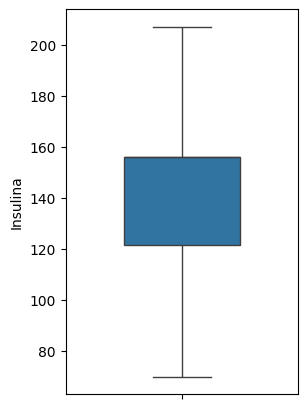

In [140]:
#Mostra novamento o grafico de Insulina sem os valores outliers
fig,ax = plt.subplots(figsize = (3,5))
sns.boxplot(dados['Insulina'],width=0.5,ax=ax,fliersize=3)

<Axes: xlabel='Pressão arterial', ylabel='Count'>

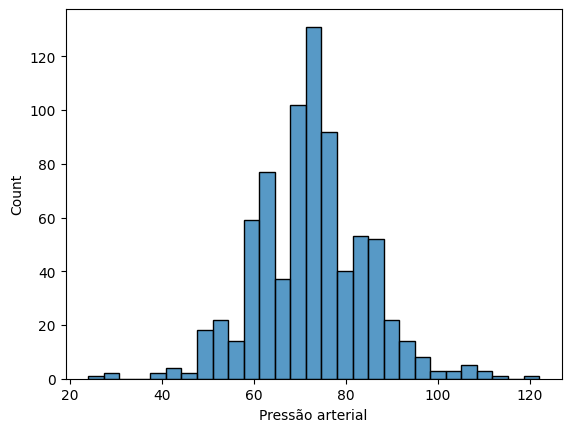

In [141]:
sns.histplot(dados['Pressão arterial']) #grafico de pressão arterial - melhoria na identificação dos dados (sistólica ou diastólica?)

<ipython-input-142-978a92d770ac>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dados['Pressão arterial']) #grafico identico ao anterior, mas com linha


<Axes: xlabel='Pressão arterial', ylabel='Density'>

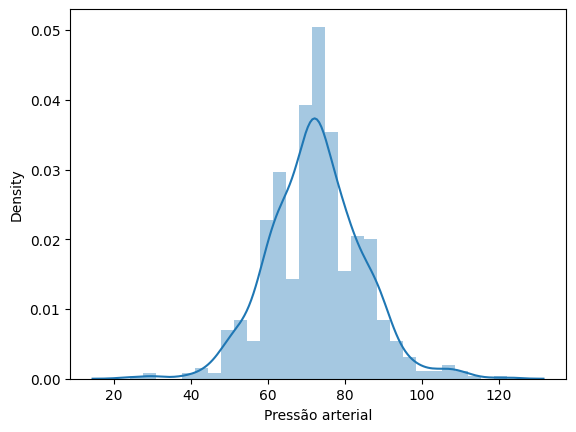

In [142]:
sns.distplot(dados['Pressão arterial']) #grafico identico ao anterior, mas com linha

In [143]:
colunas = dados.columns

In [144]:
colunas

Index(['Gravidez', 'Glicose', 'Pressão arterial', 'Espessura da pele',
       'Insulina', 'IMC', 'Função Pedigree', 'Idade', 'Resultado'],
      dtype='object')

In [145]:
colunas = ('Gravidez', 'Glicose', 'Pressão arterial', 'Espessura da pele', 'Insulina', 'IMC', 'Função Pedigree', 'Idade')

In [ ]:
scaler = MinMaxScaler()

In [146]:
def mudar(qual):
  dados[qual] = scaler.fit_transform(dados[[qual]])
#Função para transformar os valores usando o MinMaxScaler

In [147]:
for col in colunas:
  mudar(col)
#Chama o função MinMax pra realizar a transformação

In [148]:
X = dados.drop(columns=['Resultado'])
y = dados['Resultado']
#separação das colunas para treino e teste

In [149]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.5,random_state=42)
#separação dos dados para treino e teste.

In [150]:
# Cria função 'machine' que facilita na repetição de parte do código
def machine(nome, modelo):
  modelo.fit(X_train, y_train)
  pred = modelo.predict(X_test)
  score = accuracy_score(pred, y_test)
  print(f'{nome} {round(score*100, 2)}')
  report = classification_report(pred, y_test)
  print(report)

log = LogisticRegression()
dtr = DecisionTreeClassifier()
rfc = RandomForestClassifier()
svm = SVC(C=0.9)
knn = KNeighborsClassifier(n_neighbors=1)
red = MLPClassifier( hidden_layer_sizes=(100, 50, 20),activation='logistic')
mnb = MultinomialNB()
gbm = GradientBoostingClassifier()
xgbc = XGBClassifier(random_state=42, device='cuda')

lista = (log, dtr, rfc, svm, knn, red, mnb, gbm, xgbc)
nomes = ('Regressão Logística', 'Árvores de Decisão', 'Random Forests', 'SVM (Support Vector Machines)', 'KNN (K-Nearest Neighbors)', 'Rede neural',
         'Multinomial Naive Bayes', 'Gradient Boosting Machines (GBM)', 'XGBClassifier')

In [151]:
# Testa todas a linguagens para identificar qual melhor estima o resultado
for a in range(0, 9):
  machine(nomes[a], lista[a])

Regressão Logística 77.86
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       275
           1       0.59      0.71      0.64       109

    accuracy                           0.78       384
   macro avg       0.73      0.76      0.74       384
weighted avg       0.79      0.78      0.78       384

Árvores de Decisão 69.53
              precision    recall  f1-score   support

           0       0.74      0.78      0.76       241
           1       0.60      0.55      0.57       143

    accuracy                           0.70       384
   macro avg       0.67      0.66      0.67       384
weighted avg       0.69      0.70      0.69       384

Random Forests 75.52
              precision    recall  f1-score   support

           0       0.82      0.81      0.82       256
           1       0.63      0.64      0.64       128

    accuracy                           0.76       384
   macro avg       0.72      0.73      0.73       384
we

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.p


Multinomial Naive Bayes 66.15
              precision    recall  f1-score   support

           0       1.00      0.66      0.80       384
           1       0.00      0.00      0.00         0

    accuracy                           0.66       384
   macro avg       0.50      0.33      0.40       384
weighted avg       1.00      0.66      0.80       384

Gradient Boosting Machines (GBM) 75.78
              precision    recall  f1-score   support

           0       0.79      0.84      0.81       239
           1       0.70      0.63      0.66       145

    accuracy                           0.76       384
   macro avg       0.74      0.73      0.74       384
weighted avg       0.75      0.76      0.75       384

XGBClassifier 75.26
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       235
           1       0.71      0.62      0.66       149

    accuracy                           0.75       384
   macro avg       0.74      0.73     

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:38:20] WARNING: /workspace/src/context.cc:43: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:38:20] WARNING: /workspace/src/context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)


In [152]:
#https://medium.com/20-21/m%C3%BAltiplos-gr%C3%A1ficos-com-matplotlib-c4ba73510855 - anotação do site para vários gráficos. Retirar linha antes de enviar